In [177]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
# load first residual vector
residual_vector = np.loadtxt('../data/simulation_data/res_100.dat')

In [179]:
# Perform Fourier Transform
residual_vector_fft = np.fft.fft(residual_vector)

# Shift
residual_vector_fft_shifted = np.fft.fftshift(residual_vector_fft)

# Create low pass
def create_low_pass_filter(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    return mask

# Apply low pass filter
low_pass_filter = create_low_pass_filter(residual_vector_fft.shape, 10)

# Apply filter
residual_vector_fft_shifted_filtered = residual_vector_fft_shifted * low_pass_filter

# Shift back
residual_vector_fft_filtered = np.fft.ifftshift(residual_vector_fft_shifted_filtered)

# Perform Inverse Fourier Transform
residual_vector_filtered = np.fft.ifft(residual_vector_fft_filtered)

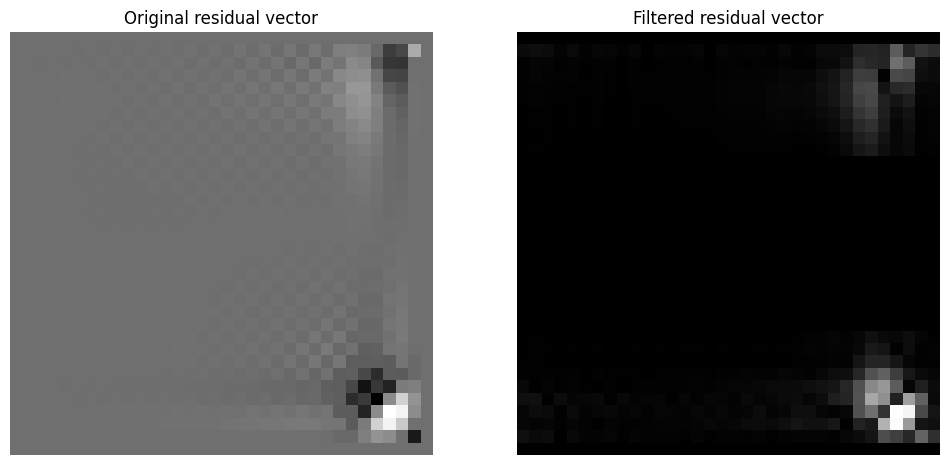

In [180]:
# Plot the original and filtered residual vector
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(residual_vector, cmap='gray')
plt.title('Original residual vector')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(residual_vector_filtered), cmap='gray')
plt.title('Filtered residual vector')
plt.axis('off')
plt.show()


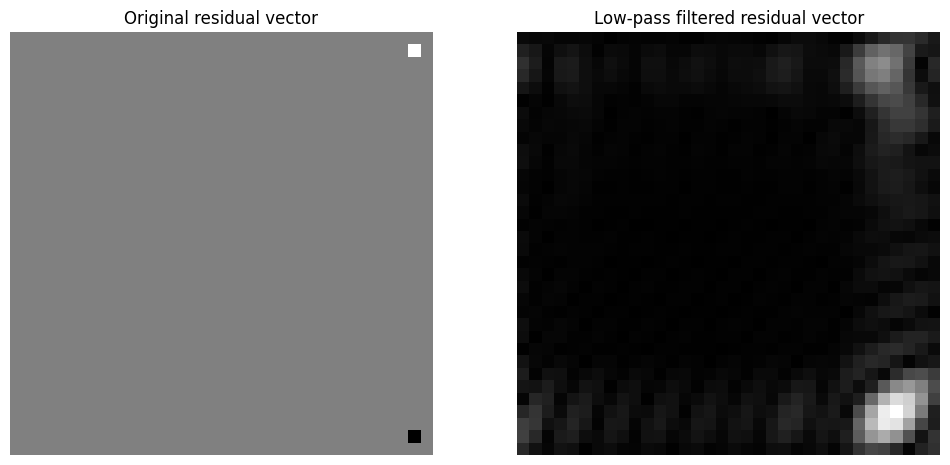

In [238]:
# Plot the original and filtered residual vector
i = 0
residual_vector_original = np.loadtxt(f'../data/simulation_data/res_{i}.dat')
residual_vector_loaded = np.loadtxt(f'../data/simulation_data_low/res_{i}.dat')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(residual_vector_original, cmap='gray')
plt.title('Original residual vector')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(residual_vector_loaded, cmap='gray')
plt.title('Low-pass filtered residual vector')
plt.axis('off')
plt.show()


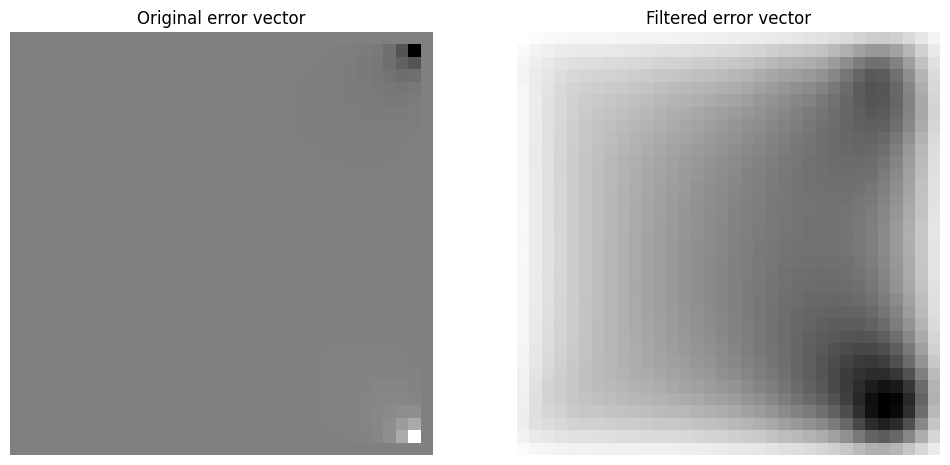

In [222]:
# Plot the original and filtered residual vector
i = 0
error_vector_original = np.loadtxt(f'../data/simulation_data/e_{i}.dat')
error_vector_loaded = np.loadtxt(f'../data/simulation_data_low/e_{i}.dat')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(error_vector_original, cmap='gray')
plt.title('Original error vector')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(error_vector_loaded, cmap='gray')
plt.title('Filtered error vector')
plt.axis('off')
plt.show()
